In [2]:
!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org spacy

You should consider upgrading via the 'c:\users\ankit.rathi\anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
!conda install -c conda-forge spacy-model-en_core_web_lg

In [1]:
!pip install -U spacy
!python -m spacy download en_core_web_lg

ERROR: Could not install packages due to an OSError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/1f/52/cb29e82a8b4e41b3f0c125005918dbc8668a34919e92ea8992362a9d6d08/spacy-3.2.1-cp38-cp38-win_amd64.whl (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1125)')))

You should consider upgrading via the 'c:\users\ankit.rathi\anaconda3\python.exe -m pip install --upgrade pip' command.
Traceback (most recent call last):
  File "C:\Users\ankit.rathi\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\ankit.rathi\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\ankit.rathi\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.conne

In [1]:
# import libraries and data
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df_articles_labeled = pd.read_csv('data/Recommendation_Engine_Labeled.csv')
df_articles_month = pd.read_csv('data/dataset-articles.csv')

cols = ['Link','Relevant']
df_articles_labeled = df_articles_labeled[cols]

df_articles = pd.merge(df_articles_month,df_articles_labeled,on='Link',how='left')

In [2]:
# all lables in lowercase
df_articles['Relevant'] = df_articles['Relevant'].str.lower()

In [3]:
# articles where lables are not available
df_articles[df_articles['Relevant'].isna()]

,Title,SubTitle,Text,Link,Tags,Month,Relevant
0,#12DaysofSwigmas – Happy Holidays from The Dai...,"On the 12th Day of Swigmas, The Daily Swig gav...","Forget five gold rings, this year’s must-have ...",https://portswigger.net/daily-swig/12daysofswi...,"['Events', 'Industry', 'News', 'Organizations'...",12,NaN
1,Raimund Genes Cup: Trio of near misses ends as...,"A dozen teams competed in cloud, IoT, OSINT, f...",A Romanian team has ended a run of near misses...,https://portswigger.net/daily-swig/raimund-gen...,"['Events', 'Education', 'Hacking', 'Techniques...",12,NaN
2,Popular WordPress platform Flywheel vulnerable...,Malicious actors could allegedly wreak havoc b...,UPDATE A subdomain takeover vulnerability in a...,https://portswigger.net/daily-swig/popular-wor...,"['Vulnerabilities', 'WordPress', 'DNS', 'Secur...",12,NaN
3,Wireless coexistence – New attack technique ex...,Attackers can use connections between wireless...,Vulnerabilities in wireless chip designs could...,https://portswigger.net/daily-swig/wireless-co...,"['Hacking', 'Techniques', 'Network', 'Security...",12,NaN
4,US clothing supplier Pro Wrestling Tees hit by...,Law enforcement alerted company to compromise ...,"Pro Wrestling Tees, which sells t-shirts desig...",https://portswigger.net/daily-swig/us-clothing...,"['US', 'Data', 'Breach', 'Retail', 'Malware', ...",12,NaN
5,Bug bounty platforms handling thousands of Log...,Leading platforms report back from the front l...,UPDATED Bug bounty hunters have already submit...,https://portswigger.net/daily-swig/bug-bounty-...,"['Log4j', 'Bug', 'Bounty', 'Vulnerabilities', ...",12,NaN
6,Anti-cheating browser extension fails web secu...,XSS flaw in Proctorio gets resolved,A web security flaw in an anti-cheating browse...,https://portswigger.net/daily-swig/anti-cheati...,"['XSS', 'Browsers', 'Education', 'Vulnerabilit...",12,NaN
7,Multiple vulnerabilities in Microsoft Teams co...,Only one of the issues has so far been patched,Security vulnerabilities in Microsoft Teams co...,https://portswigger.net/daily-swig/multiple-vu...,"['Microsoft', 'Vulnerabilities', 'SSRF', 'Log4...",12,NaN
8,Survey scams rekindled using advertising indus...,More bad men than Mad Men,Cybercriminals are using new targeted tools an...,https://portswigger.net/daily-swig/survey-scam...,"['Fraud', 'Cybercrime', 'Phishing', 'Dark', 'W...",12,NaN
9,Safe browsing: Google fixes Chrome Site Isolat...,Vulnerability in Chrome’s service worker featu...,A set of features meant to speed up web page l...,https://portswigger.net/daily-swig/safe-browsi...,"['Chrome', 'Browsers', 'Vulnerabilities', 'Goo...",12,NaN


In [4]:
# counts of relevance
df_articles['Relevant'].value_counts()

no     674
yes     36
Name: Relevant, dtype: int64

In [5]:
# split dataset in train, valid and test sets
df_articles['Type'] = 'train'
df_articles.loc[df_articles['Month'] == 11, 'Type'] = 'valid'
df_articles.loc[df_articles['Month'] == 12, 'Type'] = 'test'

In [6]:
# extract blacklist and mark the rule flag
df_articles_yes = df_articles[(df_articles['Relevant'] == 'yes') & (df_articles['Type'] == 'train')]
df_articles_no = df_articles[(df_articles['Relevant'] == 'no') & (df_articles['Type'] == 'train')]

blacklist_keys = set(pd.Series(' '.join(df_articles_no['Tags'].str.replace("]", "").str.replace("[", "").str.replace("'", "").str.replace(",", "").str.lower()).split()).value_counts(ascending=False).index) - set(pd.Series(' '.join(df_articles_yes['Tags'].str.replace("]", "").str.replace("[", "").str.replace("'", "").str.replace(",", "").str.lower()).split()).value_counts(ascending=False).index)

df_articles['Rule'] = 0

for key in blacklist_keys:   
    
    if len(df_articles[df_articles['Tags'].str.lower().str.contains(key, na=False)]['Relevant'].value_counts().index) == 1:
        df_articles.loc[df_articles['Tags'].str.lower().str.contains(key, na=False), 'Rule'] = 1


In [7]:
# label distribution for keyword
df_articles[df_articles['Tags'].str.lower().str.contains('chrome', na=False)]['Relevant'].value_counts()

no     27
yes    10
Name: Relevant, dtype: int64

In [8]:
# label distribution for keyword
df_articles[df_articles['Text'].str.lower().str.contains('rce', na=False)]['Relevant'].value_counts()

no     479
yes     28
Name: Relevant, dtype: int64

In [9]:
# articles following the rule
df_articles['Rule'].value_counts()

1    537
0    226
Name: Rule, dtype: int64

In [10]:
# verify if all articles following the rules of blaclist are not relevant
df_articles[df_articles['Rule'] == 1]['Relevant'].value_counts()

no    497
Name: Relevant, dtype: int64

In [11]:
# distribution of labels for articles not adhering the rules
df_articles[df_articles['Rule'] == 0]['Relevant'].value_counts()

no     177
yes     36
Name: Relevant, dtype: int64

In [12]:
# month-wise articles following the rules
df_articles[df_articles['Rule'] == 1]['Month'].value_counts()

3     51
4     51
6     47
7     47
9     46
11    45
8     44
2     43
5     42
10    42
1     40
12    39
Name: Month, dtype: int64

In [13]:
# month-wise articles not following the rules
df_articles[df_articles['Rule'] == 0]['Month'].value_counts()

11    25
9     24
7     23
3     22
10    22
2     20
1     19
6     18
8     17
5     13
12    13
4     10
Name: Month, dtype: int64

In [14]:
# articles to be labeled in Dec month
df_articles[df_articles['Month'] == 12]['Rule'].value_counts()

1    39
0    13
Name: Rule, dtype: int64

In [15]:
# month-wise distribution of relevant articles
df_articles[df_articles['Relevant'] == 'yes']['Month'].value_counts()

11    8
7     7
9     4
10    4
2     3
3     3
5     3
6     3
4     1
Name: Month, dtype: int64

In [16]:
# articles following the rules in validation
df_articles[(df_articles['Rule'] == 1) & (df_articles['Type'] == 'valid')].shape

(45, 9)

In [17]:
# articles following the rules in test
df_articles[(df_articles['Rule'] == 1) & (df_articles['Type'] == 'test')].shape

(39, 9)

In [18]:
# split distribution
df_articles['Type'].value_counts()

train    641
valid     70
test      52
Name: Type, dtype: int64

In [19]:
# save the analysis
df_articles.to_csv('data/Articles-Relevance-Analysis.csv', index=False)

In [20]:
# pick the articles not following the rules
df_articles = df_articles[df_articles['Relevant'].notnull()]
df_articles = df_articles[df_articles['Rule'] == 0]

In [21]:
# define text and labels based on train, valid and test split
X_train = df_articles[(df_articles['Rule'] == 0) & (df_articles['Type'] == 'train')]['Tags'].tolist()
y_train = df_articles[(df_articles['Rule'] == 0) & (df_articles['Type'] == 'train')]["Relevant"].apply(lambda i: 0 if i == 'no' else 1)

X_valid = df_articles[(df_articles['Rule'] == 0) & (df_articles['Type'] == 'valid')]['Tags'].tolist()
y_valid = df_articles[(df_articles['Rule'] == 0) & (df_articles['Type'] == 'valid')]["Relevant"].apply(lambda i: 0 if i == 'no' else 1)

X_test = df_articles[(df_articles['Rule'] == 0) & (df_articles['Type'] == 'test')]['Tags'].tolist()

In [22]:
# filter train and validation articles
df_articles_train = df_articles[(df_articles['Rule'] == 0) & (df_articles['Type'] == 'train')]
df_articles_valid = df_articles[(df_articles['Rule'] == 0) & (df_articles['Type'] == 'valid')]

In [23]:
# import required libraries
import pandas as pd
from bs4 import BeautifulSoup             
import re
from nltk.corpus import stopwords # Import the stop word list
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt

In [24]:
# pick the relevant columns
df_articles_train = df_articles_train[['Relevant','Tags']]
df_articles_train = df_articles_train.reset_index()

df_articles_valid = df_articles_valid[['Relevant','Tags']]
df_articles_valid = df_articles_valid.reset_index()

In [25]:

def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review,).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

In [26]:
df_articles_train["Tags"].size

188

In [27]:
def get_clean_articles(df_articles):
    # Get the number of reviews based on the dataframe column size
    num_articles = df_articles["Tags"].size

    # Initialize an empty list to hold the clean reviews
    clean_articles = []

    # Loop over each review; create an index i that goes from 0 to the length
    # of the article list 
    print ("Cleaning and parsing the set articles...\n")
    clean_articles = []
    for i in range( 0, num_articles ):
        # If the index is evenly divisible by 10000, print a message
        if( (i+1)%10000 == 0 ):
            print ("Text %d of %d\n" % ( i+1, num_articles ))                                                                 
        clean_articles.append( review_to_words( df_articles["Tags"][i] ))
    print("Done")
    return clean_articles

clean_train_articles = get_clean_articles(df_articles_train)
clean_valid_articles = get_clean_articles(df_articles_valid)

Cleaning and parsing the set articles...

Done
Cleaning and parsing the set articles...

Done


In [28]:
def get_bag_of_words(clean_articles):
    print ("Creating the bag of words...\n")
    from sklearn.feature_extraction.text import CountVectorizer

    # Initialize the "CountVectorizer" object, which is scikit-learn's
    # bag of words tool.  
    vectorizer = CountVectorizer(analyzer = "word",   \
                                 tokenizer = None,    \
                                 preprocessor = None, \
                                 stop_words = None,   \
                                 max_features = 90) 

    # The input to fit_transform should be a list of strings.
    data_features = vectorizer.fit_transform(clean_articles)

    # Numpy arrays are easy to work with, so convert the result to an 
    # array
    data_features = data_features.toarray()
    print ("Done")
    return data_features

train_data_features = get_bag_of_words(clean_train_articles)
valid_data_features = get_bag_of_words(clean_valid_articles)

Creating the bag of words...

Done
Creating the bag of words...

Done


In [29]:
len(clean_train_articles)
len(clean_valid_articles)

25

In [30]:
#!pip install wordcloud

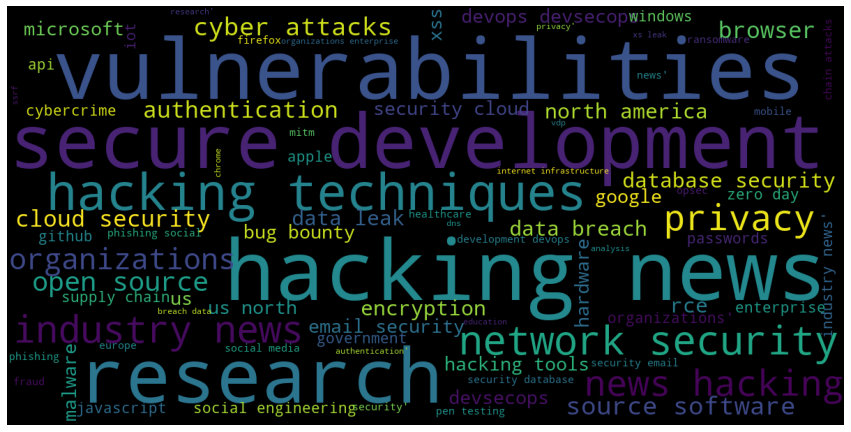

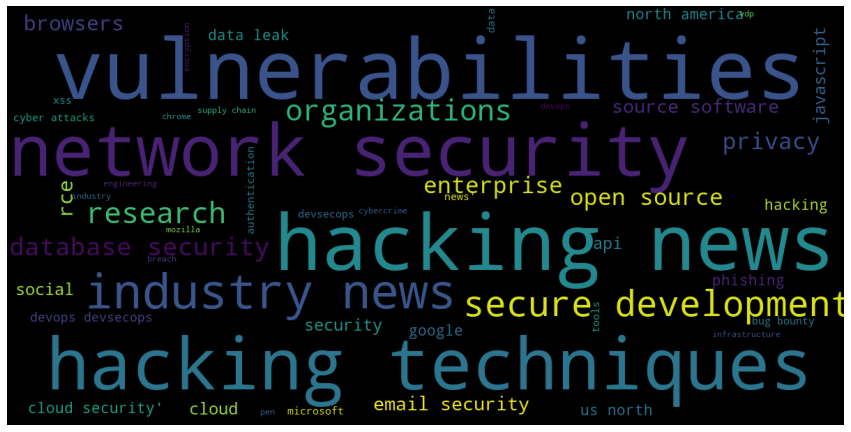

In [31]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(clean_train_articles)
show_wordcloud(clean_valid_articles)

In [32]:
#splitting dataset into training and testing data
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(train_data_features,df_articles["Relevant"],test_size=0.33,stratify=df_articles["Relevant"])
print("Splitting Done")

Splitting Done


In [33]:
print ("Training the random forest model...")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit(train_data_features, y_train )
print ("Done")

Training the random forest model...
Done


In [34]:
# Use the random forest to make sentiment label predictions
result = forest.predict(valid_data_features)
print("Predictions Done")

Predictions Done


In [35]:
y_valid.values

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0], dtype=int64)

In [36]:
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
#checking accuracy score
accuracy=accuracy_score(y_valid,result)
accuracy

0.68

In [38]:
#checking confusion matrix
cm=confusion_matrix(y_valid,result)
cm

array([[17,  0],
       [ 8,  0]], dtype=int64)

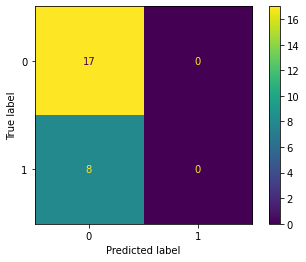

In [39]:
# plot the confusion matrix
y_actual = pd.Series(y_valid, name='Actual')
y_predict_tf = pd.Series(result, name='Predicted')

plot_confusion_matrix(forest, valid_data_features, y_valid) 
plt.show()

In [40]:
#checking f1 score
f1=f1_score(y_valid.values,result, pos_label=1)
f1

0.0

In [41]:
# accuracy, precision, recall, f1 scoe and roc auc
print("Accuracy Score: {}".format(accuracy_score(y_valid, result)))
print("Precision Score: {}".format(precision_score(y_valid, result)))
print("Recall Score: {}".format(recall_score(y_valid, result)))
print("F1 Score: {}".format(f1_score(y_valid, result)))
#print("ROC AUC Score: {}".format(roc_auc_score(y_valid, predicted_proba[:, -1])))

Accuracy Score: 0.68
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0


In [42]:
#
pd.Series(' '.join(df_articles['Tags'].str.replace("]", "").str.replace("[", "").str.lower()).split()).value_counts(ascending=False)[:50]/710

'hacking',            0.423944
'news',               0.339437
'security',           0.338028
'vulnerabilities',    0.214085
'secure',             0.177465
'development',        0.170423
'research',           0.163380
'industry',           0.157746
'network',            0.150704
'techniques',         0.146479
'organizations',      0.125352
'data',               0.119718
'privacy',            0.102817
'open',               0.091549
'source',             0.091549
'devsecops',          0.090141
'software',           0.088732
'authentication',     0.084507
'cloud',              0.084507
'cyber-attacks',      0.081690
'database',           0.074648
'devops',             0.073239
'us',                 0.071831
'browsers',           0.069014
'leak',               0.063380
'north',              0.060563
'social',             0.056338
'encryption',         0.054930
'rce',                0.053521
'breach',             0.052113
'google',             0.050704
'enterprise',         0.050704
'america

In [43]:
pd.Series(' '.join(df_articles_yes['Tags'].str.replace("]", "").str.replace("[", "").str.lower()).split()).value_counts(ascending=False)[:50]/36

'hacking',            1.027778
'news',               0.833333
'security',           0.666667
'secure',             0.500000
'vulnerabilities',    0.500000
'development',        0.500000
'techniques',         0.444444
'research',           0.444444
'privacy',            0.416667
'network',            0.388889
'industry',           0.388889
'browsers',           0.305556
'microsoft',          0.277778
'encryption',         0.277778
'devsecops',          0.222222
'organizations',      0.222222
'google',             0.194444
'cyber-attacks',      0.194444
'cloud',              0.194444
'social',             0.194444
'chrome',             0.194444
'infrastructure',     0.194444
'open',               0.166667
'devops',             0.166667
'software',           0.166667
'mozilla',            0.166667
'source',             0.166667
'internet',           0.166667
'rce',                0.138889
'enterprise',         0.138889
'windows',            0.138889
'engineering',        0.138889
'firefox

In [44]:
pd.Series(' '.join(df_articles_no['Tags'].str.replace("]", "").str.replace("[", "").str.lower()).split()).value_counts(ascending=False)[:50]/674

'hacking',            1.185460
'security',           1.182493
'news',               1.075668
'vulnerabilities',    0.519288
'industry',           0.507418
'data',               0.489614
'network',            0.476261
'organizations',      0.431751
'research',           0.422849
'secure',             0.413947
'development',        0.394659
'techniques',         0.375371
'cyber-attacks',      0.353116
'database',           0.333828
'privacy',            0.293769
'us',                 0.274481
'source',             0.267062
'open',               0.267062
'cloud',              0.264095
'breach',             0.255193
'north',              0.252226
'software',           0.250742
'america',            0.238872
'cybercrime',         0.234421
'authentication',     0.229970
'leak',               0.222552
'devsecops',          0.213650
'europe',             0.212166
'social',             0.181009
'malware',            0.170623
'email',              0.170623
'devops',             0.167656
'enterpr

In [45]:
df_articles['Relevant'].value_counts()

no     177
yes     36
Name: Relevant, dtype: int64

In [46]:
df_articles_yes = df_articles[(df_articles['Relevant'] == 'yes') & (df_articles['Type'] == 'train')]
df_articles_no = df_articles[(df_articles['Relevant'] == 'no') & (df_articles['Type'] == 'train')]

keys = set(pd.Series(' '.join(df_articles_no['Tags'].str.replace("]", "").str.replace("[", "").str.replace("'", "").str.replace(",", "").str.lower()).split()).value_counts(ascending=False).index) - set(pd.Series(' '.join(df_articles_yes['Tags'].str.replace("]", "").str.replace("[", "").str.replace("'", "").str.replace(",", "").str.lower()).split()).value_counts(ascending=False).index)
keys

{'browser', 'healthcare', 'interviews', 'waf'}

In [47]:
keys = set(pd.Series(' '.join(df_articles_no['Tags'].str.replace("]", "").str.replace("[", "").str.replace("'", "").str.replace(",", "").str.lower()).split()).value_counts(ascending=False).index) - set(pd.Series(' '.join(df_articles_yes['Tags'].str.replace("]", "").str.replace("[", "").str.replace("'", "").str.replace(",", "").str.lower()).split()).value_counts(ascending=False).index) 
keys2 = set(pd.Series(' '.join(df_articles_yes['Tags'].str.replace("]", "").str.replace("[", "").str.replace("'", "").str.replace(",", "").str.lower()).split()).value_counts(ascending=False).index) - set(pd.Series(' '.join(df_articles_no['Tags'].str.replace("]", "").str.replace("[", "").str.replace("'", "").str.replace(",", "").str.lower()).split()).value_counts(ascending=False).index)
keys.update(keys2)
keys

{'austria',
 'browser',
 'certification',
 'healthcare',
 'interviews',
 'poland',
 'waf'}

In [48]:
df_articles['Diff'] = 0

for key in keys:   
    
    if len(df_articles[df_articles['Tags'].str.lower().str.contains(key, na=False)]['Relevant'].value_counts().index) == 1:
        df_articles.loc[df_articles['Tags'].str.lower().str.contains(key, na=False), 'Rule'] = 1
    
df_articles['Rule'].value_counts()

0    210
1      3
Name: Rule, dtype: int64

In [49]:
df_articles[df_articles['Tags'].str.lower().str.contains('waf', na=False)]['Relevant'].value_counts()

no     5
yes    1
Name: Relevant, dtype: int64